In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Mois,Accenteur mouchet,Corneille noire,Fauvette à tête noire,Geai des chênes,Goéland argenté,Grimpereau des jardins,Grive musicienne,Merle noir,Mésange bleue,...,Pigeon biset,Pigeon ramier,Pinson des arbres,Pouillot véloce,Roitelet huppé,Roitelet à triple bandeau,Rougegorge familier,Sittelle torchepot,Troglodyte mignon,Étourneau sansonnet
0,janvier,1,22,0,4,0,3,1,22,16,...,1,37,3,0,4,0,14,0,5,33
1,fevrier,1,9,0,3,0,4,1,13,7,...,1,8,3,1,2,0,6,2,4,7
2,mars,0,25,6,2,1,7,3,24,16,...,17,24,11,3,1,2,9,2,10,16
3,avril,3,7,8,2,0,2,0,12,7,...,3,10,3,2,0,1,1,0,5,35
4,mai,0,7,10,1,0,5,0,24,4,...,8,9,6,4,0,0,11,0,7,48


In [6]:
r = data["Perruche à collier"].corr(data["Mésange charbonnière"]) 
print(f"Le coefficient de corrélation linéaire est de : {r}")

Le coefficient de corrélation linéaire est de : 0.7535001525090188


In [7]:
mesanges = data["Mésange charbonnière"]
mesanges

0     22
1      9
2     12
3      4
4      2
5     10
6      3
7      5
8      8
9      3
10     7
11     3
Name: Mésange charbonnière, dtype: int64

In [9]:
perruches = data["Perruche à collier"]
perruches

0     18
1      2
2     16
3      7
4      9
5     13
6      4
7      2
8     12
9      4
10     9
11     3
Name: Perruche à collier, dtype: int64

Text(0.5, 1.0, "Nombre d'observations de Perruches à collier \n en fonction du nombre de Mésanges Charbonnières")

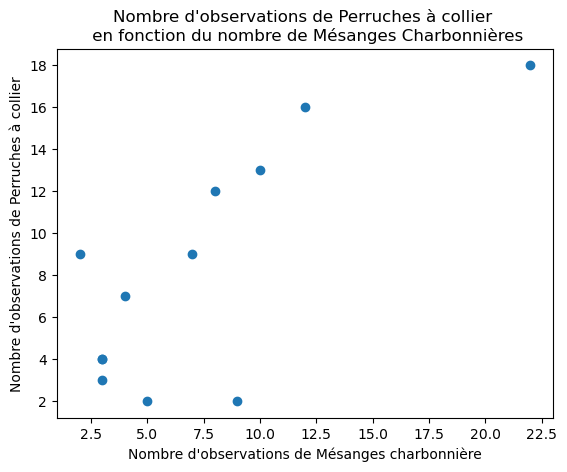

In [32]:
plt.scatter(x,y)
plt.xlabel("Nombre d'observations de Mésanges charbonnière")
plt.ylabel("Nombre d'observations de Perruches à collier")
plt.title("Nombre d'observations de Perruches à collier \n en fonction du nombre de Mésanges Charbonnières")

In [19]:
# Variable explication : nombre d'observations de Mésanges Charbonnière

x = np.array(mesanges)
x = x.reshape(len(x),1)
x.shape

(12, 1)

In [23]:
# Variable à expliquer : nombre d'observations de Perruches à Collier

y = np.array(perruches)
y = y.reshape(len(y),1)
y.shape

(12, 1)

In [77]:
# Modèle

features = 1
X = np.hstack((x,np.ones(x.shape)))
theta = np.random.randn(features+1,1) #Génère des paramètres aléatoires pour le modèle

def regression_model(X,theta):
    """
    Calcule un modèle de régression linéaire
    """
    return X.dot(theta)

In [76]:
# Fonction coût (erreur quadratique moyenne)

m = len(y)

def cost_function(X,theta,y):
    """
    Retourne un scalaire donnant la valeur de la fonction coût
    """
    return 1/(2*m) * np.sum((regression_model(X,theta) - y)**2)

cost_function(X,theta,y)

95.08896048421379

In [52]:
# Gradients

def gradient(X,theta,y):
    return 1/m * X.T.dot(regression_model(X,theta) - y)

[[0.74651581]
 [2.74989387]]


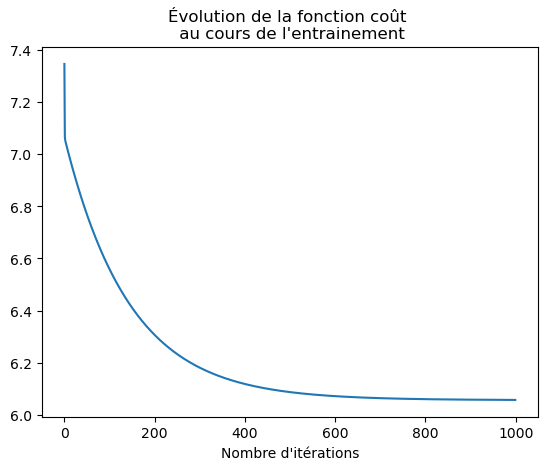

In [94]:
# Optimisation

def descente_gradient(X,theta,y,learning_rate = 0.01, n_iter = 1000):
    
    cost_history = []
    
    for i in range(n_iter):
        theta = theta - learning_rate * gradient(X,theta,y)
        cost_history.append(cost_function(X,theta,y))
    
    plt.plot(range(n_iter),cost_history)
    plt.title("Évolution de la fonction coût \n au cours de l'entrainement")
    plt.xlabel("Nombre d'itérations")
    return theta

theta_final = descente_gradient(X,theta,y)
print(theta_final)

In [78]:
perruches_prediction = regression_model(X,theta_final)

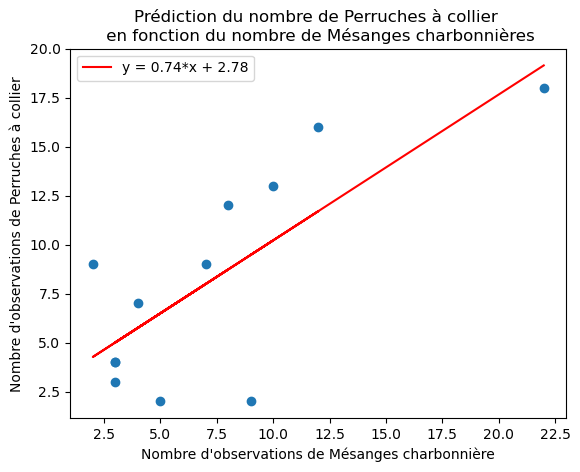

In [87]:
plt.scatter(x,y)
plt.plot(x,perruches_prediction,c="r",label=f"y = {round(float(theta_final[0]),2)}*x + {round(float(theta_final[1]),2)}")
plt.xlabel("Nombre d'observations de Mésanges charbonnière")
plt.ylabel("Nombre d'observations de Perruches à collier")
plt.title("Prédiction du nombre de Perruches à collier \n en fonction du nombre de Mésanges charbonnières")
plt.legend()
plt.show()

In [89]:
# Calcul du coefficient de détermination r^2

r_2 = (data["Perruche à collier"].corr(data["Mésange charbonnière"]))**2
r_2

0.5677624798311146

In [92]:
# Coefficient de détermination ajusté

r_2_adjusted =  1 - (1 - r_2) * (m - 1) / (m - features - 1)
r_2_adjusted

0.5245387278142261